#Análisis de Lista Nominal

In [ ]:
#Importar librerias a utilizar 
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
#from scipy.optimize import minimize
import os
import glob 
import pandas as pd
import re

In [ ]:
#Importando los archivos de texto
import glob
files=glob.glob("./Datos/*.txt")
files

['./Datos/02_OCT_2019.txt',
 './Datos/09_MAYO_2020.txt',
 './Datos/06_FEBRERO_2020.txt',
 './Datos/15_NOVIEMBRE_2020.txt',
 './Datos/01_SEP_2019.txt',
 './Datos/08_ABRIL_2020.txt',
 './Datos/16_DICIEMBRE_2020.txt',
 './Datos/04_DICIEMBRE_2019.txt',
 './Datos/11_JUNIO_2020.txt',
 './Datos/03_NOVIEMBRE_2019.txt',
 './Datos/10_JULIO_2020.txt',
 './Datos/14_OCTUBRE_2020.txt',
 './Datos/07_MARZO_2020.txt',
 './Datos/13_SEPTIEMBRE_2020.txt',
 './Datos/12_AGOSTO_2020.txt',
 './Datos/05_ENERO_2020.txt']

In [ ]:
#Acomodando los archivos de texto
date=[]
date_=[]
files_=[]

for i,file in enumerate(files):
    date.append(re.findall(r'\d+',file)[0])


temp=sorted(range(len(date)), key=date.__getitem__)

for i in temp:
    date_.append(date[i])
    print(date[i],files[i])
    files_.append(files[i])

01 ./Datos/01_SEP_2019.txt
02 ./Datos/02_OCT_2019.txt
03 ./Datos/03_NOVIEMBRE_2019.txt
04 ./Datos/04_DICIEMBRE_2019.txt
05 ./Datos/05_ENERO_2020.txt
06 ./Datos/06_FEBRERO_2020.txt
07 ./Datos/07_MARZO_2020.txt
08 ./Datos/08_ABRIL_2020.txt
09 ./Datos/09_MAYO_2020.txt
10 ./Datos/10_JULIO_2020.txt
11 ./Datos/11_JUNIO_2020.txt
12 ./Datos/12_AGOSTO_2020.txt
13 ./Datos/13_SEPTIEMBRE_2020.txt
14 ./Datos/14_OCTUBRE_2020.txt
15 ./Datos/15_NOVIEMBRE_2020.txt
16 ./Datos/16_DICIEMBRE_2020.txt


In [ ]:
#Filtrando para Gto y agrupando los documentos de texto, acomodando lista nominal por municipio
for i,file in enumerate(files_):
    data=pd.read_csv(file)
    data=data[1:]
    data=data[data['ENTIDAD']==11][1:]
    mpo=data.groupby(['MUNICIPIO']).sum()
    if i==0 :
        if 'LISTA_NAL' in mpo.columns:
            df_mpo = pd.DataFrame(mpo['LISTA_NAL'])
        if 'LISTA_NACIONAL' in mpo.columns:
            df_mpo = pd.DataFrame(mpo['LISTA_NACIONAL'])
        if 'LISTA' in mpo.columns:
            df_mpo = pd.DataFrame(mpo['LISTA'])
    else:
        if 'LISTA_NAL' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA_NAL']
        if 'LISTA_NACIONAL' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA_NACIONAL']
        if 'LISTA' in mpo.columns:
            df_mpo[date_[i]]=mpo['LISTA']

df_mpo

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LISTA,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16
MUNICIPIO,,,,,,,,,,,,,,,,
1,67427,67541.0,67463,67463,65505,66245,66750,66736.0,68057,68052,68054,68093,68244,68241,68422,68611
2,94040,94139.0,93970,93970,91712,92759,93343,93340.0,94967,94952,94967,95009,95209,95595,96005,95934
3,128446,128937.0,128978,128978,125884,127461,128544,128543.0,130720,130708,130717,130992,131172,131903,132669,133489
4,49656,49787.0,49818,49818,48907,49311,49596,49596.0,50283,50273,50281,50287,50324,50647,50867,50877
5,67868,68120.0,68218,68218,66789,67553,68063,68058.0,69125,69114,69124,69132,69287,69745,70072,70194
6,4207,4228.0,4200,4200,4145,4162,4212,4212.0,4244,4244,4244,4249,4253,4245,4262,4261
7,378361,379387.0,378402,378402,370594,374915,378228,378153.0,383007,382980,383002,383071,383484,385535,386714,387848
8,31431,31546.0,31455,31455,30822,31080,31406,31385.0,31800,31797,31799,31818,31816,32043,32435,32565
9,60267,60366.0,60325,60325,58753,59504,59917,59910.0,60931,60929,60931,60987,61077,61486,61679,61915


In [ ]:
#Convirtiendo la tabla en un array
municipios=np.asarray(df_mpo)
municipios

array([[  67427.,   67541.,   67463.,   67463.,   65505.,   66245.,
          66750.,   66736.,   68057.,   68052.,   68054.,   68093.,
          68244.,   68241.,   68422.,   68611.],
       [  94040.,   94139.,   93970.,   93970.,   91712.,   92759.,
          93343.,   93340.,   94967.,   94952.,   94967.,   95009.,
          95209.,   95595.,   96005.,   95934.],
       [ 128446.,  128937.,  128978.,  128978.,  125884.,  127461.,
         128544.,  128543.,  130720.,  130708.,  130717.,  130992.,
         131172.,  131903.,  132669.,  133489.],
       [  49656.,   49787.,   49818.,   49818.,   48907.,   49311.,
          49596.,   49596.,   50283.,   50273.,   50281.,   50287.,
          50324.,   50647.,   50867.,   50877.],
       [  67868.,   68120.,   68218.,   68218.,   66789.,   67553.,
          68063.,   68058.,   69125.,   69114.,   69124.,   69132.,
          69287.,   69745.,   70072.,   70194.],
       [   4207.,    4228.,    4200.,    4200.,    4145.,    4162.,
       

Text(0.5, 0, 'Lista nominal correspondiente al mes')

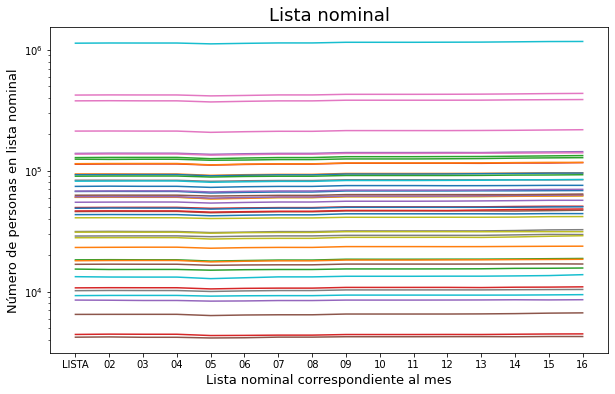

In [10]:
plt.figure(figsize=(10,6))

for i in range(len(df_mpo)):
    plt.plot(df_mpo.iloc[i])
    plt.yscale('log')

plt.title('Lista nominal', fontsize=18)
plt.ylabel('Número de personas en lista nominal', fontsize=13)
plt.xlabel('Lista nominal correspondiente al mes', fontsize=13)

#Regresión lineal y predicción

In [ ]:
fits=[]
prediction_lnal=[]

for i in range(len(municipios)):
    x=np.arange(len(municipios[i]))
    m, b = np. polyfit(x, municipios[i],1,w=municipios[i])
    fits.append([m,b])
    pred=m*(x[-12]+12)+b

    prediction_lnal.append(pred)

In [ ]:
df_mpo['Prediccion Lineal']=prediction_lnal
df_mpo

,LISTA,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,Prediccion Lineal
MUNICIPIO,,,,,,,,,,,,,,,,,
1,67427,67541.0,67463,67463,65505,66245,66750,66736.0,68057,68052,68054,68093,68244,68241,68422,68611,6.852542e+04
2,94040,94139.0,93970,93970,91712,92759,93343,93340.0,94967,94952,94967,95009,95209,95595,96005,95934,9.590588e+04
3,128446,128937.0,128978,128978,125884,127461,128544,128543.0,130720,130708,130717,130992,131172,131903,132669,133489,1.328662e+05
4,49656,49787.0,49818,49818,48907,49311,49596,49596.0,50283,50273,50281,50287,50324,50647,50867,50877,5.081565e+04
5,67868,68120.0,68218,68218,66789,67553,68063,68058.0,69125,69114,69124,69132,69287,69745,70072,70194,7.011508e+04
6,4207,4228.0,4200,4200,4145,4162,4212,4212.0,4244,4244,4244,4249,4253,4245,4262,4261,4.266664e+03
7,378361,379387.0,378402,378402,370594,374915,378228,378153.0,383007,382980,383002,383071,383484,385535,386714,387848,3.871404e+05
8,31431,31546.0,31455,31455,30822,31080,31406,31385.0,31800,31797,31799,31818,31816,32043,32435,32565,3.230422e+04
9,60267,60366.0,60325,60325,58753,59504,59917,59910.0,60931,60929,60931,60987,61077,61486,61679,61915,6.169103e+04


In [ ]:
#Predicción de casillas
a=np.asarray(prediction_lnal).sum()
print('Total de casillas a instalar:')
math.ceil(a/750)

Total de casillas a instalar:


6038

#Regresión para las secciones

In [ ]:
#Filtrando para Gto y agrupando los documentos de texto, acomodando lista nominal por seccion
for i,file in enumerate(files_):
    data=pd.read_csv(file)
    data=data[1:]
    data=data[data['ENTIDAD']==11][1:]
    sec=data.groupby(['SECCION']).sum()
    if i==0 :
        if 'LISTA_NAL' in sec.columns:
            df_sec = pd.DataFrame(sec['LISTA_NAL'])
        if 'LISTA_NACIONAL' in sec.columns:
            df_sec = pd.DataFrame(sec['LISTA_NACIONAL'])
        if 'LISTA' in sec.columns:
            df_sec = pd.DataFrame(sec['LISTA'])
    else:
        if 'LISTA_NAL' in sec.columns:
            df_sec[date_[i]]=sec['LISTA_NAL']
        if 'LISTA_NACIONAL' in sec.columns:
            df_sec[date_[i]]=sec['LISTA_NACIONAL']
        if 'LISTA' in sec.columns:
            df_sec[date_[i]]=sec['LISTA']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_sec

,LISTA,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16
SECCION,,,,,,,,,,,,,,,,
1,1539,1545.0,1538,1538,1493,1515,1527,1527.0,1552,1552.0,1552,1557.0,1562.0,1561.0,1565.0,1571.0
2,1998,2008.0,2005,2005,1939,1963,1977,1977.0,2026,2026.0,2026,2024.0,2034.0,2028.0,2028.0,2033.0
3,1522,1522.0,1520,1520,1457,1477,1493,1493.0,1531,1531.0,1531,1529.0,1533.0,1528.0,1534.0,1537.0
4,945,949.0,952,952,915,932,938,938.0,957,957.0,957,959.0,961.0,959.0,962.0,957.0
5,1067,1065.0,1064,1064,1026,1036,1047,1045.0,1072,1072.0,1072,1071.0,1076.0,1073.0,1067.0,1068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,1556,1560.0,1582,1582,1588,1601,1615,1615.0,1616,1616.0,1616,1618.0,1619.0,1624.0,1644.0,1646.0
3151,1336,1343.0,1336,1336,1329,1343,1352,1352.0,1365,1365.0,1365,1363.0,1366.0,1381.0,1384.0,1391.0
3152,1074,1080.0,1086,1086,1080,1094,1095,1095.0,1107,1107.0,1107,1110.0,1112.0,1112.0,1118.0,1125.0


In [ ]:
#Convirtiendo la tabla en un array
secciones=df_sec.fillna(0)
secciones=np.asarray(secciones)
secciones

array([[1539., 1545., 1538., ..., 1561., 1565., 1571.],
       [1998., 2008., 2005., ..., 2028., 2028., 2033.],
       [1522., 1522., 1520., ..., 1528., 1534., 1537.],
       ...,
       [1074., 1080., 1086., ..., 1112., 1118., 1125.],
       [1289., 1295., 1302., ..., 1350., 1354., 1363.],
       [2105., 2126., 2154., ..., 2292., 2318., 2322.]])

In [ ]:
fit_=[]
prediccion_sec=[]

for i in range(len(secciones)):
    x=np.arange(len(secciones[i]))
    m, b = np. polyfit(x, secciones[i],1,w=secciones[i])
    fit_.append([m,b])
    preds=m*(x[-12]+12)+b

    prediccion_sec.append(preds)

In [ ]:
#Prediccion de la lista nominal por cada sección
df_sec['Prediccion Lista por sección']=prediccion_sec
df_sec

,LISTA,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,Prediccion Lista por sección
SECCION,,,,,,,,,,,,,,,,,
1,1539,1545.0,1538,1538,1493,1515,1527,1527.0,1552,1552.0,1552,1557.0,1562.0,1561.0,1565.0,1571.0,1567.749045
2,1998,2008.0,2005,2005,1939,1963,1977,1977.0,2026,2026.0,2026,2024.0,2034.0,2028.0,2028.0,2033.0,2036.265013
3,1522,1522.0,1520,1520,1457,1477,1493,1493.0,1531,1531.0,1531,1529.0,1533.0,1528.0,1534.0,1537.0,1535.075208
4,945,949.0,952,952,915,932,938,938.0,957,957.0,957,959.0,961.0,959.0,962.0,957.0,962.107691
5,1067,1065.0,1064,1064,1026,1036,1047,1045.0,1072,1072.0,1072,1071.0,1076.0,1073.0,1067.0,1068.0,1072.183293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,1556,1560.0,1582,1582,1588,1601,1615,1615.0,1616,1616.0,1616,1618.0,1619.0,1624.0,1644.0,1646.0,1650.031735
3151,1336,1343.0,1336,1336,1329,1343,1352,1352.0,1365,1365.0,1365,1363.0,1366.0,1381.0,1384.0,1391.0,1388.369243
3152,1074,1080.0,1086,1086,1080,1094,1095,1095.0,1107,1107.0,1107,1110.0,1112.0,1112.0,1118.0,1125.0,1125.522967


In [ ]:
sec_1=np.asarray(df_sec['Prediccion Lista por sección'])
sec_1

array([1567.74904496, 2036.26501265, 1535.07520809, ..., 1125.52296676,
       1359.60574601, 2339.03177336])

In [ ]:
#Predicción del número de casillas tomando en cuenta las secciones
pr=[]
for i in range(len(sec_1)):
    a=sec_1[i]/750
    pr.append(a)

print('Número de casillas por sección')
for i in range(len(pr)):
    print(math.ceil(pr[i]))

Número de casillas por sección
3
3
3
2
2
4
2
2
4
3
5
2
2
1
1
3
2
2
2
3
3
4
1
3
2
3
3
1
2
2
3
2
2
3
2
2
2
4
3
2
2
2
1
2
1
2
2
2
1
3
5
2
2
2
1
2
2
3
2
2
2
2
1
2
2
1
4
2
1
2
2
2
2
3
1
2
2
2
3
2
5
2
2
2
2
6
1
1
2
1
2
1
2
2
2
2
2
1
2
2
2
2
2
2
1
2
1
2
2
1
2
1
1
3
3
2
1
2
2
1
2
1
3
1
1
2
1
2
1
1
2
2
1
1
1
3
3
3
1
2
8
2
2
2
9
3
2
2
2
2
1
1
2
2
4
6
7
3
2
2
1
1
1
6
2
1
1
2
2
1
2
5
5
2
4
2
3
1
2
3
1
2
2
2
2
2
1
3
2
3
2
1
1
3
1
1
3
1
1
4
2
3
1
2
2
2
2
2
1
2
2
2
2
3
1
4
1
3
2
2
1
2
2
2
2
2
3
1
2
2
1
1
2
1
2
2
1
2
1
1
1
1
1
2
2
2
3
2
2
2
4
5
1
2
3
3
3
3
2
2
3
2
3
2
2
1
1
1
3
2
2
2
3
1
2
2
1
1
2
2
1
1
2
1
2
2
1
5
4
3
3
5
2
7
3
2
2
1
2
2
2
4
2
3
2
1
3
1
2
2
4
1
2
4
7
2
2
1
3
2
1
3
2
3
2
3
3
3
2
2
1
2
2
1
2
22
3
5
6
3
7
5
18
4
2
3
2
2
2
2
4
2
1
3
5
3
1
2
2
2
4
2
2
1
5
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
1
2
2
2
2
1
1
1
1
2
2
2
2
7
1
1
1
1
2
2
2
2
2
13
2
2
2
2
1
1
1
1
2
2
1
2
2
2
1
1
1
1
2
1
1
2
2
3
2
1
1
1
1
2
2
2
2
2
1
2
3
2
2
2
2
2
2
3
2
2
2
6
1
1
1
1
2
2
2
2
1
1
7
3
7
2
2
3
4
4
3
3
2
4
2
2


In [ ]:
#Numero de casillas total tomando en cuenta las secciones
b=sum(pr)
print('Total de casillas a instalar:')
math.ceil(b)

Total de casillas a instalar:


6039